In [8]:
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
from paper_changes import *
# manual feature selection
from collections import defaultdict
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.decomposition import SparsePCA
from scipy.stats import zscore
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## No Imputation

/home/pdaly/notebooks/paper_changes.py:24: ResourceWarning: unclosed file <_io.BufferedReader name='/home/pdaly/RSD/out/powers_and_locs.pkl'>
  data = pickle.load(open(infile, 'rb'))
100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


                   train   test
accuracy           0.749  0.707
balanced_accuracy  0.740  0.697
precision          0.758  0.720
recall             0.812  0.783
roc                0.769  0.645
          mean       std  count
pc_1  0.046676  0.028964    330
pc_2  0.157421  0.064229    400
pc_3 -0.992979  0.298841    410
pc_4  0.086836  0.169805    370


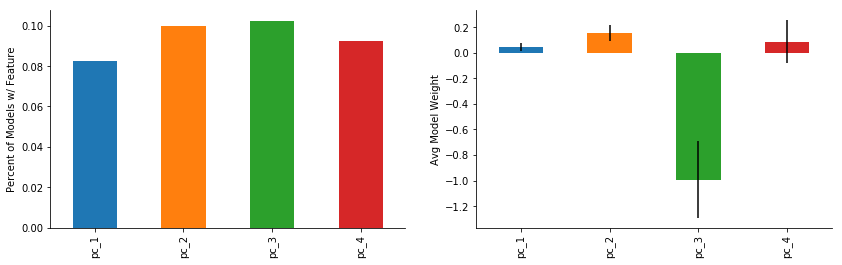

In [46]:
X, y = load_data(infile='/home/pdaly/RSD/out/powers_and_locs.pkl')

n_feat = 6

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## No Imputation, No PCA

/home/pdaly/notebooks/paper_changes.py:24: ResourceWarning: unclosed file <_io.BufferedReader name='/home/pdaly/RSD/out/powers_and_locs.pkl'>
  data = pickle.load(open(infile, 'rb'))
100%|██████████| 10/10 [00:02<00:00,  3.82it/s]


                   train   test
accuracy           0.702  0.659
balanced_accuracy  0.698  0.653
precision          0.736  0.696
recall             0.731  0.696
roc                0.776  0.650
            mean       std  count
alpha   0.108278  0.096721    350
beta    0.162881  0.071165    390
gammaH -0.250202  0.064016    410
gammaL -0.024481  0.000032     10
theta  -0.849054  0.071605    410


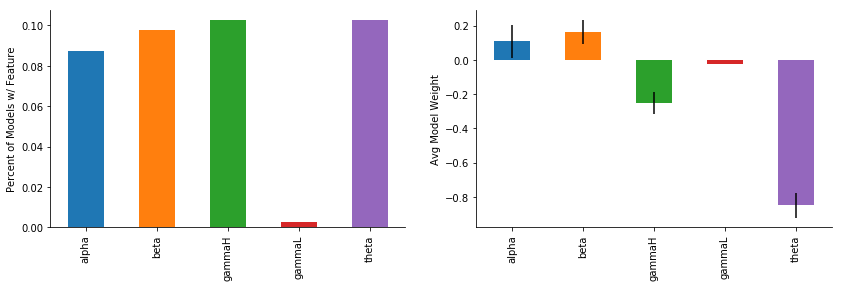

In [45]:
X, y = load_data(infile='/home/pdaly/RSD/out/powers_and_locs.pkl')

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## One Community, One Band

100%|██████████| 10/10 [00:02<00:00,  3.81it/s]


                   train   test
accuracy           0.463  0.463
balanced_accuracy  0.521  0.522
precision          0.951  1.000
recall             0.042  0.043
roc                0.548  0.522
       mean       std  count
0 -0.371295  0.022355    400


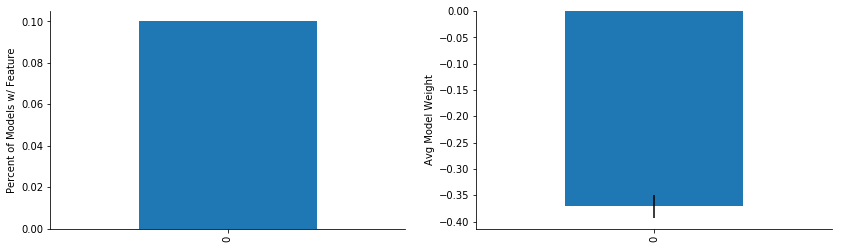

In [19]:
X, y = load_data(zscore=False, infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2-0.5.power.pkl')

X = X.mean(axis=1).to_frame().apply(zscore)

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## One Community, 6 Bands

100%|██████████| 10/10 [00:02<00:00,  3.71it/s]


                   train   test
accuracy           0.744  0.683
balanced_accuracy  0.735  0.669
precision          0.754  0.692
recall             0.807  0.783
roc                0.766  0.638
          mean       std  count
pc_1  0.045548  0.029736    340
pc_2  0.131351  0.058662    400
pc_3 -1.016261  0.303263    410
pc_4  0.088803  0.172789    360


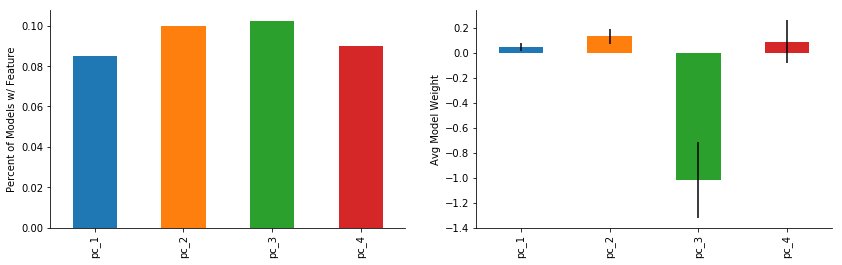

In [21]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2-0.5.power.pkl')

n_feat = 6

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## One Community, 6 Bands, No PCA

100%|██████████| 10/10 [00:02<00:00,  3.84it/s]


                   train   test
accuracy           0.715  0.659
balanced_accuracy  0.709  0.653
precision          0.740  0.696
recall             0.759  0.696
roc                0.774  0.638
              mean       std  count
alpha_0   0.107450  0.097884    360
beta_0    0.157196  0.071762    390
gammaH_0 -0.281847  0.064460    410
gammaL_0 -0.036357  0.000027     10
theta_0  -0.836511  0.071372    410


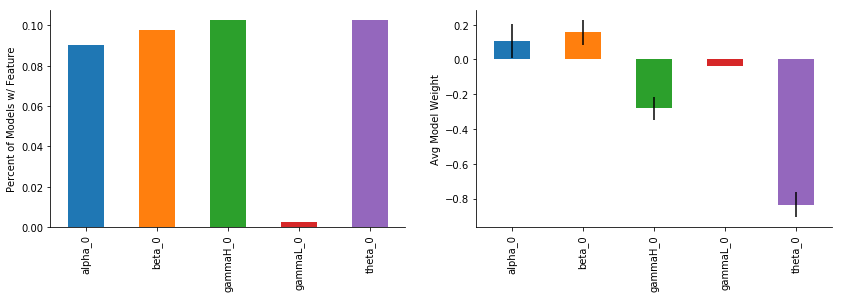

In [23]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2-0.5.power.pkl')

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communities, 6 Bands, Original DS

100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


                   train   test
accuracy           0.813  0.780
balanced_accuracy  0.811  0.774
precision          0.840  0.792
recall             0.825  0.826
roc                0.874  0.758
           mean       std  count
pc_1   0.056643  0.021148    410
pc_10  0.391606  0.003981     20
pc_2   0.122497  0.044753    410
pc_3  -0.601433  0.182367    410
pc_4   0.175330  0.107676    400
pc_5  -0.403668  0.414325     30
pc_6  -1.109649  0.196188    400
pc_8   0.299287  0.000006     10


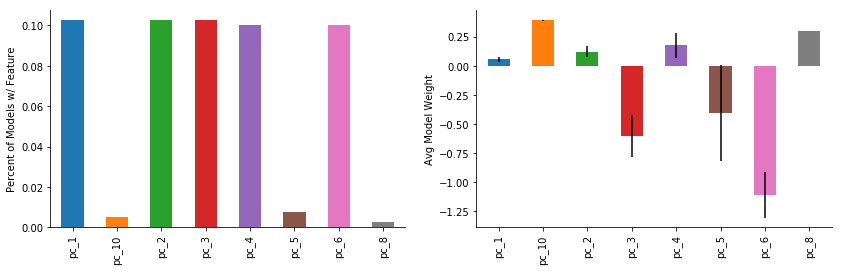

In [28]:
X, y = load_data()

n_feat = 36

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communities, 6 Bands, Original DS, No PCA

100%|██████████| 10/10 [00:02<00:00,  3.55it/s]


                   train   test
accuracy           0.761  0.659
balanced_accuracy  0.762  0.647
precision          0.805  0.680
recall             0.760  0.739
roc                0.852  0.638
              mean       std  count
alpha_1   0.151575  0.072383    350
alpha_4   0.227517  0.000864     10
alpha_5   0.153002  0.112499    100
beta_1    0.160345  0.113412    310
delta_0   0.136877  0.131250     50
gammaH_0 -0.169923  0.080243    350
gammaH_2 -0.160406  0.111320    330
gammaL_0 -0.030247  0.000226     10
gammaL_3 -0.108369  0.084244    318
theta_0  -0.391352  0.254232    400
theta_2  -0.332051  0.198388    370
theta_3  -0.373094  0.230016    370
theta_5  -0.356211  0.163493    390


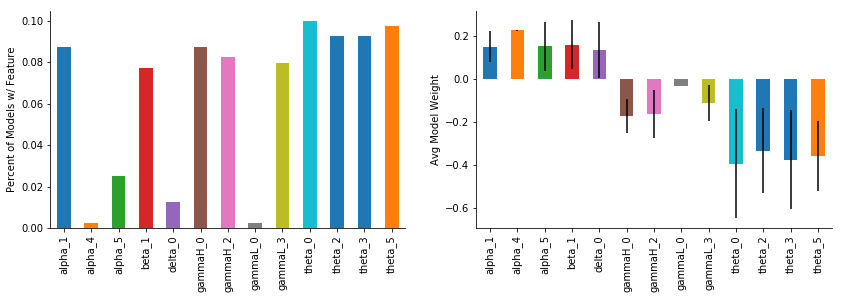

In [29]:
X, y = load_data()

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communites, 6 Bands, Shuffled DS   

100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


                   train   test
accuracy           0.755  0.707
balanced_accuracy  0.745  0.697
precision          0.760  0.720
recall             0.823  0.783
roc                0.776  0.655
          mean       std  count
pc_1  0.023335  0.010950    410
pc_2  0.058599  0.021929    400
pc_3 -0.361211  0.111236    410
pc_4  0.079277  0.085546    390
pc_5  0.033032  0.042540    110


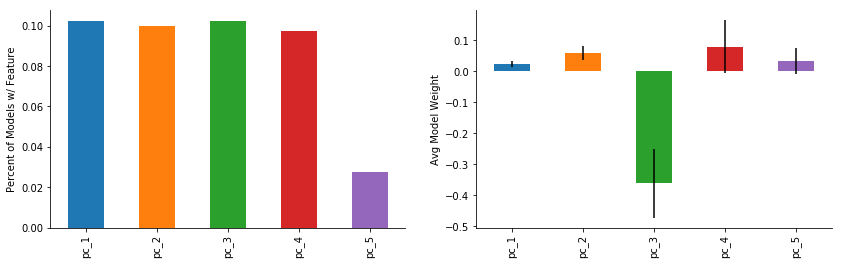

In [40]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2-1.18.power.pkl')

n_feat = 36

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communities, 6 Bands, Shuffled DS, No PCA

100%|██████████| 10/10 [00:02<00:00,  3.43it/s]


                   train   test
accuracy           0.719  0.659
balanced_accuracy  0.713  0.653
precision          0.743  0.696
recall             0.764  0.696
roc                0.780  0.635
              mean       std  count
alpha_0   0.113705  0.134705    171
alpha_11  0.093810  0.053487    175
beta_10   0.141365  0.087003    227
beta_3    0.152659  0.074834    289
gammaH_0 -0.307762  0.046074    390
gammaH_3 -0.084487  0.000067     10
gammaH_4 -0.501312  0.000070     10
gammaL_7 -0.052062  0.000052     10
theta_11 -0.619782  0.221827     54
theta_12 -0.700982  0.258172    308
theta_3  -0.371568  0.254258     54
theta_9  -0.511012  0.315438    169


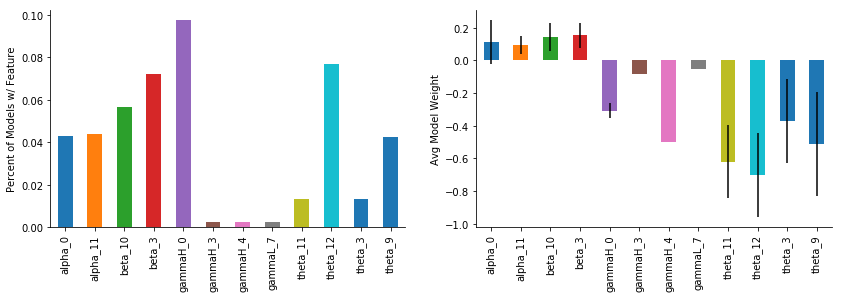

In [38]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2-1.18.power.pkl')

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communites, 6 Bands, Shuffled DS, Old Gamma

100%|██████████| 10/10 [00:02<00:00,  3.33it/s]


                   train   test
accuracy           0.755  0.707
balanced_accuracy  0.745  0.697
precision          0.760  0.720
recall             0.823  0.783
roc                0.777  0.657
          mean       std  count
pc_1  0.032519  0.015863    410
pc_2  0.081040  0.030925    400
pc_3 -0.513425  0.157165    410
pc_4  0.096315  0.111507    390


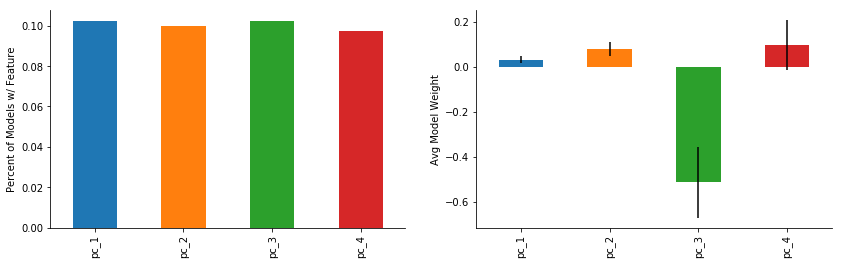

In [39]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2_old_gamma-1.18.power.pkl')

n_feat = 36

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 6 Communites, 6 Bands, Shuffled DS, Old Gamma, No PCA

100%|██████████| 10/10 [00:02<00:00,  3.70it/s]


                   train   test
accuracy           0.710  0.683
balanced_accuracy  0.703  0.675
precision          0.734  0.708
recall             0.758  0.739
roc                0.790  0.647
              mean       std  count
alpha_3   0.105234  0.104398    300
beta_3    0.223995  0.072520    400
gammaH_0 -0.167647  0.094786    190
gammaH_3 -0.078947  0.000057     10
gammaH_5 -0.271156  0.114485    370
theta_5  -0.914270  0.072196    410


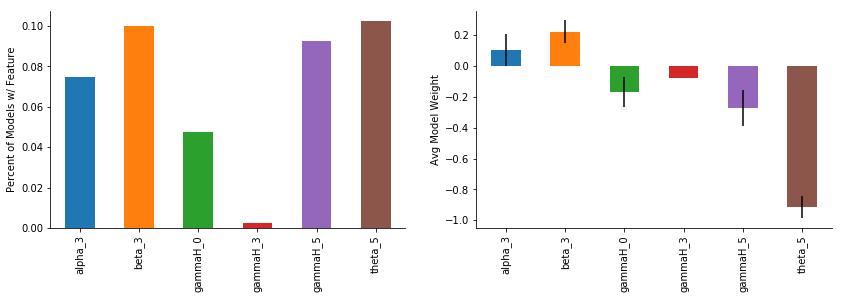

In [41]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/apr6_100samp_full-shuffle2_old_gamma-1.18.power.pkl')

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 4244 Communities, 6 Bands, Original DS

100%|██████████| 10/10 [01:52<00:00, 11.24s/it]


                   train   test
accuracy             1.0  0.634
balanced_accuracy    1.0  0.638
precision            1.0  0.700
recall               1.0  0.609
roc                  1.0  0.695
           mean       std  count
pc_1   0.007770  0.003350    400
pc_10 -0.025231  0.026285    300
pc_11 -0.004571  0.038256    310
pc_12 -0.011270  0.039539    228
pc_13  0.017110  0.027037    250
pc_14 -0.022175  0.054316     80
pc_15 -0.031740  0.077988    250
pc_16 -0.110152  0.085890    360
pc_17  0.079154  0.091042    350
pc_18  0.134118  0.171450    390
pc_19 -0.060790  0.111520    290
pc_2   0.007136  0.011612    204
pc_20  0.037010  0.068821     30
pc_21 -0.003436  0.053925     70
pc_22 -0.189449  0.136954    270
pc_23 -0.150191  0.180628    320
pc_24  0.030595  0.076727    100
pc_25  0.012294  0.028753    130
pc_26  0.026925  0.064616    300
pc_27 -0.015366  0.096549    380
pc_28 -0.033912  0.090022    340
pc_29  0.015484  0.070784    160
pc_3  -0.100886  0.029883    410
pc_30  0.036290 

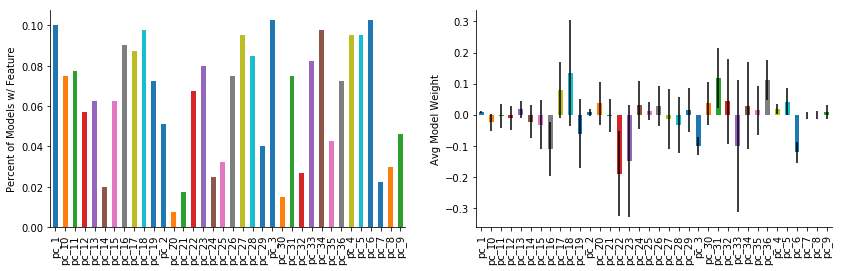

In [30]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/samp100_2h_54pid_pos-6.0.power.pkl')

n_feat = 36

pipe = Pipeline([('pca', PCA(n_feat)),
                 ('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=['pc_' + str(i+1) for i in range(n_feat)])

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)

## 4244 Communities, 6 Bands, Original DS, No PCA

100%|██████████| 10/10 [01:47<00:00, 10.78s/it]


                   train   test
accuracy           0.995  0.615
balanced_accuracy  0.995  0.615
precision          0.992  0.671
recall             1.000  0.613
roc                1.000  0.721
                mean       std  count
alpha_1426  0.015020  0.000000      1
alpha_1475  0.020553  0.021148      7
alpha_1489  0.067384  0.085526     41
alpha_1517  0.051454  0.039111      8
alpha_1568  0.210506  0.077063    393
alpha_1586  0.051379  0.045473     64
alpha_1607  0.237793  0.074339    389
alpha_1614  0.055743  0.043189     59
alpha_1634  0.080511  0.059601    266
alpha_1738  0.083022  0.064101     19
alpha_1773  0.010741  0.002857      2
alpha_1778  0.049005  0.034550      3
alpha_1826 -0.027881  0.025234     13
alpha_1843  0.120616  0.076140      9
alpha_1849 -0.050060  0.000000      1
alpha_1869 -0.026930  0.005639      2
alpha_1885 -0.008108  0.000000      1
alpha_2004  0.099051  0.068067    328
alpha_2006 -0.066310  0.076477     65
alpha_2029 -0.022614  0.012987      2
alpha_2046

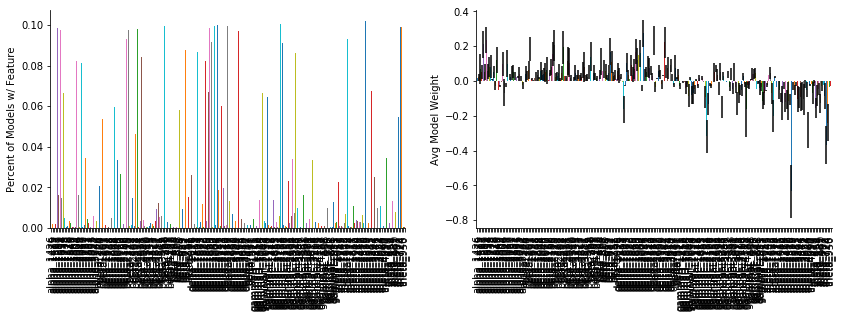

In [31]:
X, y = load_data(infile='/userdata/pdaly/supereeg/results/samp100_2h_54pid_pos-6.0.power.pkl')

n_feat = 36

pipe = Pipeline([('clf', LogisticRegression(C=0.75, penalty='l1', class_weight='balanced', solver='liblinear',
                                                max_iter=100))])
             
get_feats = lambda pipe: pd.Series(np.squeeze(pipe.steps[-1][1].coef_), 
                                   index=X.columns)

bm, trm, feats = crossval(X, y, pipe, get_feats, ite=10)

print_res(bm, trm)

fsrs = pd.DataFrame.from_dict({v: [np.mean(l), np.std(l), len(l)] for v, l in feats.items()},
                              columns=['mean', 'std', 'count'], orient='index').sort_index()
print(fsrs)

plot_res(feats)